In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
import warnings
from sklearn.preprocessing import StandardScaler

 
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
df = pd.read_excel("etf_data_final.xlsx")
r_df = pd.read_excel("random_data_final.xlsx")

In [3]:
df.head()

,Unnamed: 0,index,date,SPY_p,IWM_p,EEM_p,TLT_p,LQD_p,TIP_p,IYR_p,...,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,250,2011-12-29,107.496193,66.057526,31.844088,98.016830,85.749313,102.159256,42.352482,...,0,0,0,0,1,0,0,0,1,0
1,1,251,2011-12-30,106.967743,65.701195,31.869280,98.333130,86.112694,102.124252,42.144760,...,0,0,0,0,1,0,0,0,0,1
2,2,252,2012-01-03,108.672401,66.788040,32.843678,96.857132,86.044540,102.089241,42.404408,...,0,0,0,0,0,0,1,0,0,0
3,3,253,2012-01-04,108.842880,66.422791,32.658875,95.705551,86.112694,102.185547,41.929615,...,0,0,0,0,0,0,0,1,0,0
4,4,254,2012-01-05,109.132668,66.796974,32.516071,95.535225,85.741760,102.378059,42.233788,...,0,0,0,0,0,0,0,0,1,0


In [4]:
r_df.head()

,Unnamed: 0,index,date,SPY_p,IWM_p,EEM_p,TLT_p,LQD_p,TIP_p,IYR_p,...,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,250,2011-12-29,107.496193,66.057526,31.844088,98.016830,85.749313,102.159256,42.352482,...,0,0,0,0,1,0,0,0,1,0
1,1,251,2011-12-30,106.967743,65.701195,31.869280,98.333130,86.112694,102.124252,42.144760,...,0,0,0,0,1,0,0,0,0,1
2,2,252,2012-01-03,108.672401,66.788040,32.843678,96.857132,86.044540,102.089241,42.404408,...,0,0,0,0,0,0,1,0,0,0
3,3,253,2012-01-04,108.842880,66.422791,32.658875,95.705551,86.112694,102.185547,41.929615,...,0,0,0,0,0,0,0,1,0,0
4,4,254,2012-01-05,109.132668,66.796974,32.516071,95.535225,85.741760,102.378059,42.233788,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
r_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [6]:
print(df.columns)
print(r_df.columns)

Index(['index', 'date', 'SPY_p', 'IWM_p', 'EEM_p', 'TLT_p', 'LQD_p', 'TIP_p',
       'IYR_p', 'GLD_p',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=282)
Index(['index', 'date', 'SPY_p', 'IWM_p', 'EEM_p', 'TLT_p', 'LQD_p', 'TIP_p',
       'IYR_p', 'GLD_p',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=282)


In [7]:
df_col = ['SPY', 'IWM', 'EEM', 'TLT', 'LQD', 'TIP', 'IYR',
       'GLD', 'FXE']

dummy = ['month_1', 
         'month_2', 
         'month_3', 
         'month_4', 
         'month_5', 
         'month_6', 
         'month_7', 
         'month_8', 
         'month_9',
         'month_10',
         'month_11',
         'month_12',
         'MON', 'TUE','WED', 'THU', 'FRI']

td = [1, 3, 5, 10, 20, 40, 60, 120, 250]

In [8]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
lw=2

SPY
Real Data Processing for horizon =  1
AUC good =  0.9154301398061583


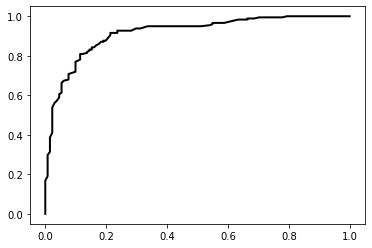

Random Data Processing for horizon =  1
Random data AUC =  0.914679646624925


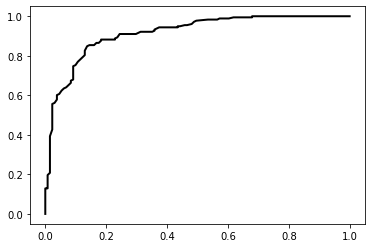

C =  200
Real_data_accuracy   :  0.8447
Random data_accuracy :  0.8382
Gain =  0.0065
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.9462685242701215


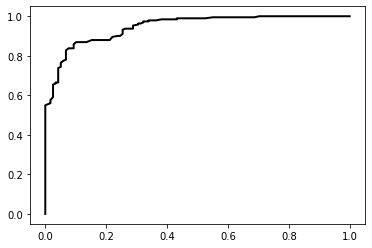

Random Data Processing for horizon =  3
Random data AUC =  0.9448930694826515


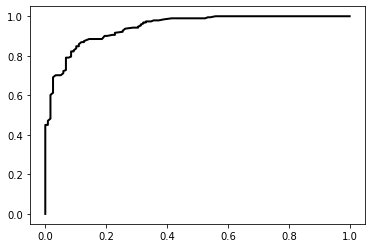

C =  200
Real_data_accuracy   :  0.8803
Random data_accuracy :  0.8706
Gain =  0.0097
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9444639256596827


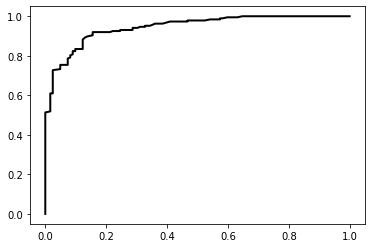

Random Data Processing for horizon =  5
Random data AUC =  0.942885947225388


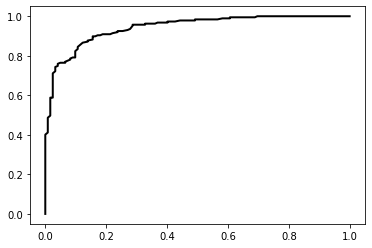

C =  200
Real_data_accuracy   :  0.8835
Random data_accuracy :  0.877
Gain =  0.0065
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9408312182741118


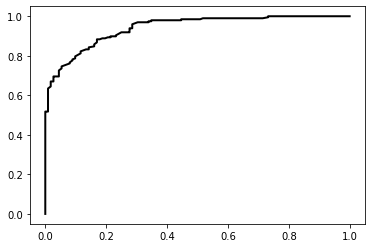

Random Data Processing for horizon =  10
Random data AUC =  0.9406725888324873


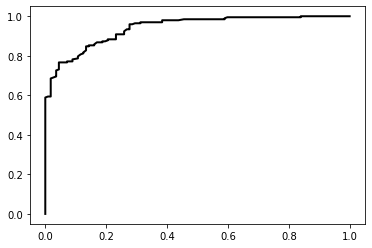

C =  200
Real_data_accuracy   :  0.8576
Random data_accuracy :  0.8447
Gain =  0.0129
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.978023503284908


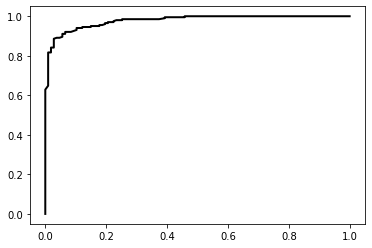

Random Data Processing for horizon =  20
Random data AUC =  0.9800129545664846


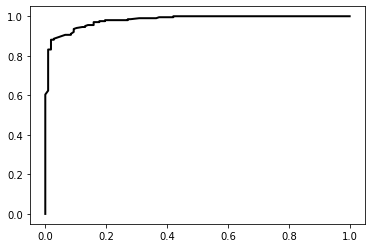

C =  200
Real_data_accuracy   :  0.9094
Random data_accuracy :  0.9191
Gain =  -0.0097
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.982397342995169


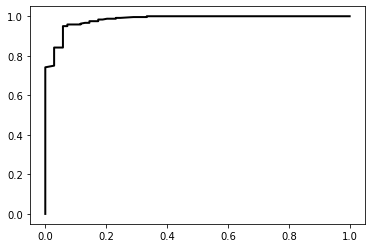

Random Data Processing for horizon =  40
Random data AUC =  0.9817632850241546


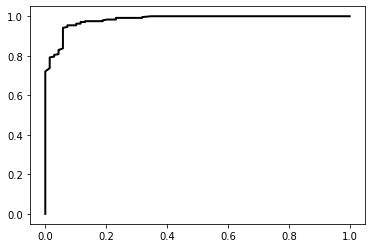

C =  200
Real_data_accuracy   :  0.945
Random data_accuracy :  0.9482
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9893529330952053


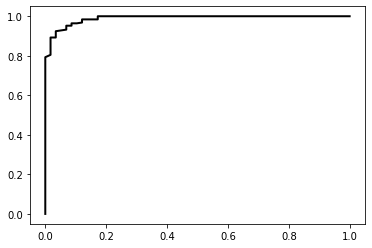

Random Data Processing for horizon =  60
Random data AUC =  0.9903146036543482


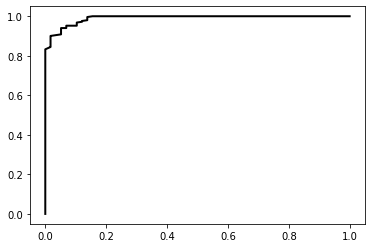

C =  200
Real_data_accuracy   :  0.9612
Random data_accuracy :  0.9579
Gain =  0.0033
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.998307761732852


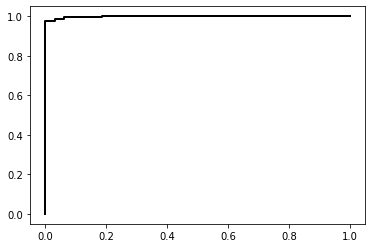

Random Data Processing for horizon =  120
Random data AUC =  0.9978564981949458


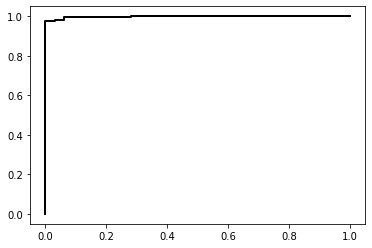

C =  200
Real_data_accuracy   :  0.9806
Random data_accuracy :  0.9773
Gain =  0.0033
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9840176715176715


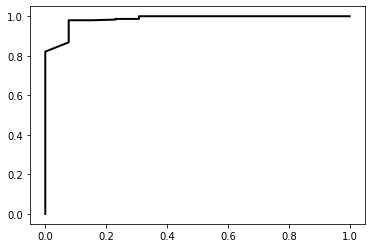

Random Data Processing for horizon =  250
Random data AUC =  0.9881756756756757


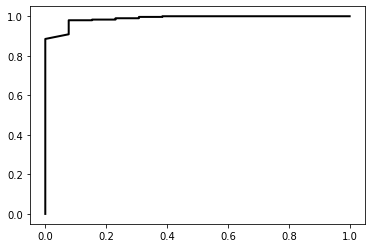

C =  200
Real_data_accuracy   :  0.9773
Random data_accuracy :  0.9773
Gain =  -0.0
---------------------------------------------

IWM
Real Data Processing for horizon =  1
AUC good =  0.8531539108494532


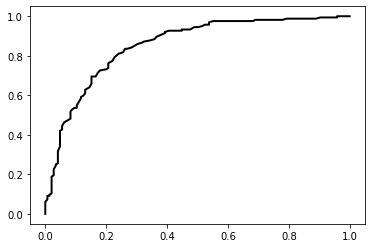

Random Data Processing for horizon =  1
Random data AUC =  0.8483599663582844


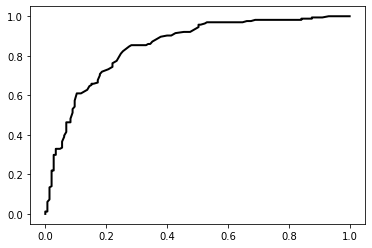

C =  200
Real_data_accuracy   :  0.7799
Random data_accuracy :  0.7767
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.931989063568011


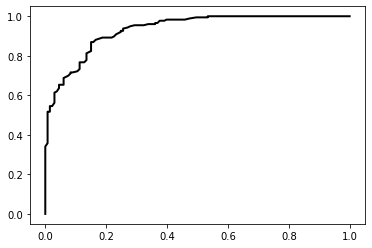

Random Data Processing for horizon =  3
Random data AUC =  0.9349581339712919


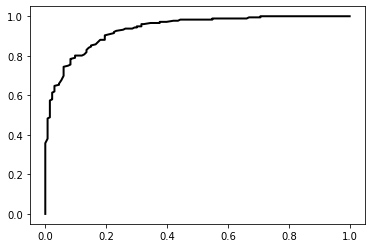

C =  200
Real_data_accuracy   :  0.8544
Random data_accuracy :  0.8608
Gain =  -0.0064
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9396537090476998


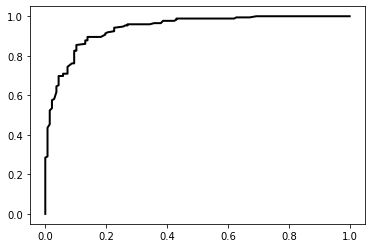

Random Data Processing for horizon =  5
Random data AUC =  0.9403751485316585


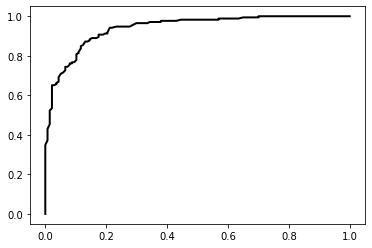

C =  200
Real_data_accuracy   :  0.877
Random data_accuracy :  0.8706
Gain =  0.0064
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9437579348286076


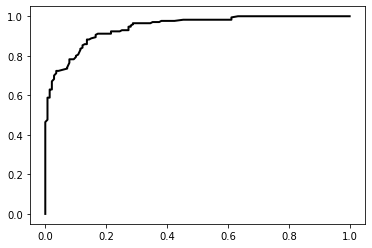

Random Data Processing for horizon =  10
Random data AUC =  0.9437156157426999


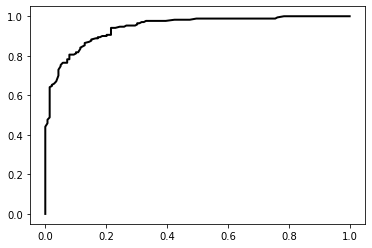

C =  200
Real_data_accuracy   :  0.8738
Random data_accuracy :  0.8608
Gain =  0.013
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9632955536181343


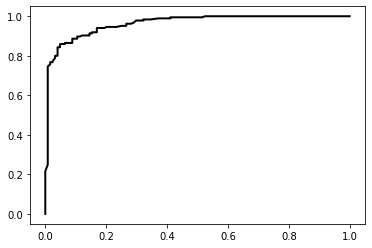

Random Data Processing for horizon =  20
Random data AUC =  0.9612903225806453


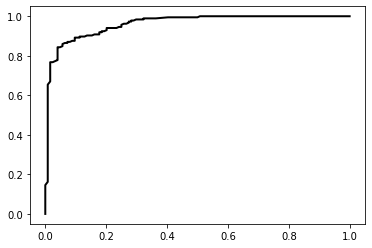

C =  200
Real_data_accuracy   :  0.8932
Random data_accuracy :  0.8932
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9715750696933493


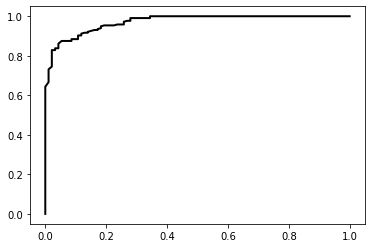

Random Data Processing for horizon =  40
Random data AUC =  0.9725706889685384


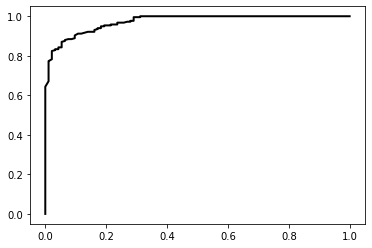

C =  200
Real_data_accuracy   :  0.8932
Random data_accuracy :  0.8997
Gain =  -0.0065
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9817677790809254


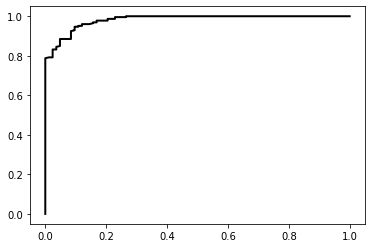

Random Data Processing for horizon =  60
Random data AUC =  0.9807282226250134


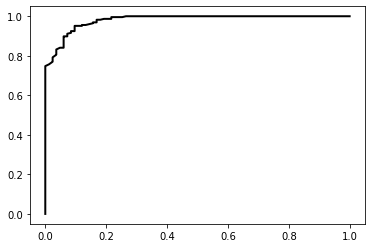

C =  200
Real_data_accuracy   :  0.9353
Random data_accuracy :  0.9385
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9912468940591823


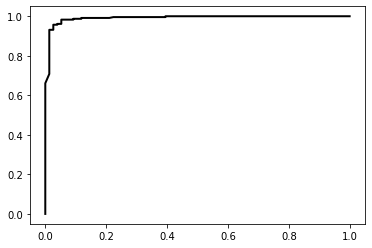

Random Data Processing for horizon =  120
Random data AUC =  0.9921504404788797


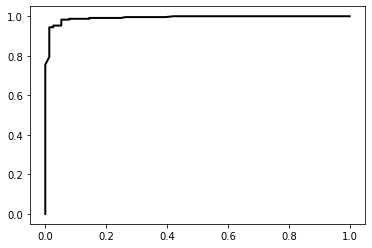

C =  200
Real_data_accuracy   :  0.9676
Random data_accuracy :  0.9709
Gain =  -0.0033
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9921652421652422


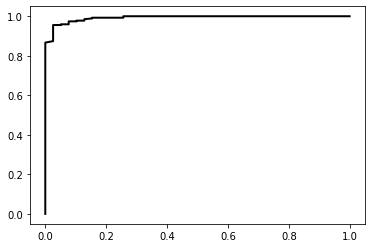

Random Data Processing for horizon =  250
Random data AUC =  0.9936372269705603


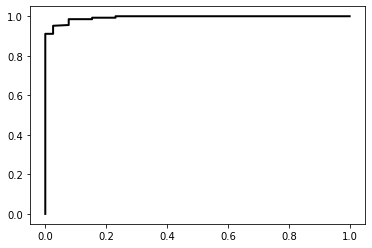

C =  200
Real_data_accuracy   :  0.9709
Random data_accuracy :  0.9676
Gain =  0.0033
---------------------------------------------

EEM
Real Data Processing for horizon =  1
AUC good =  0.8310304153677648


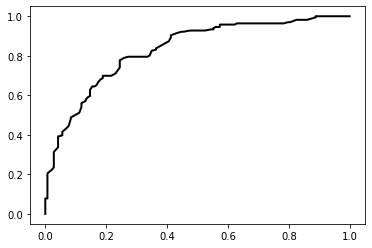

Random Data Processing for horizon =  1
Random data AUC =  0.8358539051310135


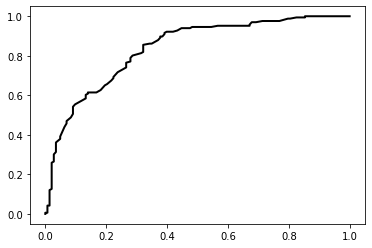

C =  200
Real_data_accuracy   :  0.7379
Random data_accuracy :  0.7379
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.863783806554891


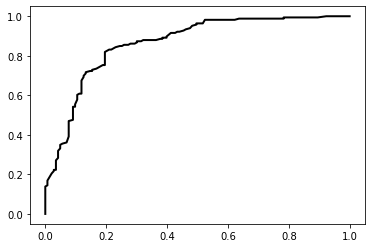

Random Data Processing for horizon =  3
Random data AUC =  0.8680596511921813


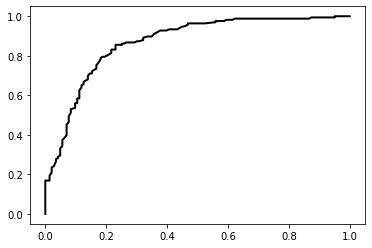

C =  200
Real_data_accuracy   :  0.7864
Random data_accuracy :  0.7735
Gain =  0.0129
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9187693855310587


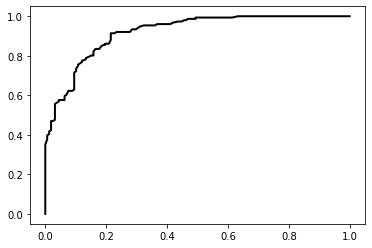

Random Data Processing for horizon =  5
Random data AUC =  0.9180777936122055


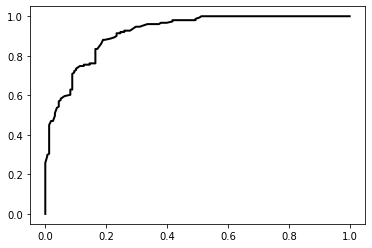

C =  200
Real_data_accuracy   :  0.8317
Random data_accuracy :  0.8414
Gain =  -0.0097
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9421996814485707


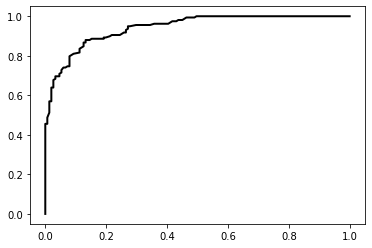

Random Data Processing for horizon =  10
Random data AUC =  0.9400410763685138


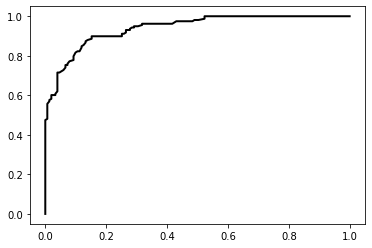

C =  200
Real_data_accuracy   :  0.8414
Random data_accuracy :  0.8479
Gain =  -0.0065
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9748098055790363


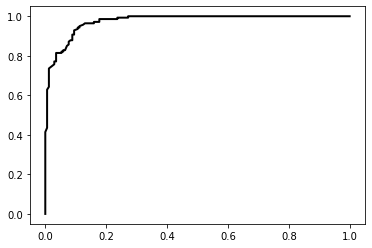

Random Data Processing for horizon =  20
Random data AUC =  0.9736686390532545


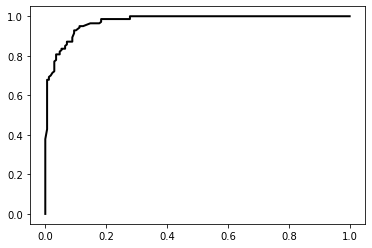

C =  200
Real_data_accuracy   :  0.9094
Random data_accuracy :  0.8932
Gain =  0.0162
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9903217697335345


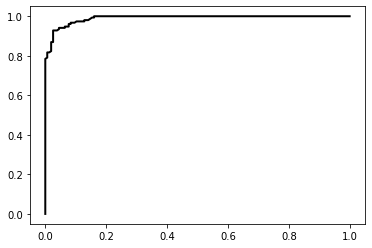

Random Data Processing for horizon =  40
Random data AUC =  0.9892743422155187


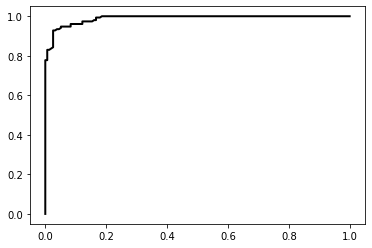

C =  200
Real_data_accuracy   :  0.9482
Random data_accuracy :  0.945
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9945734160241367


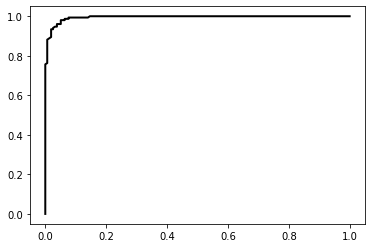

Random Data Processing for horizon =  60
Random data AUC =  0.9945943680858196


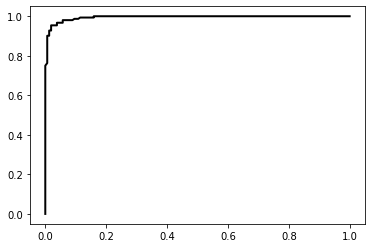

C =  200
Real_data_accuracy   :  0.9612
Random data_accuracy :  0.9579
Gain =  0.0033
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9943857885034355


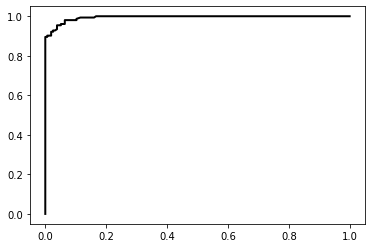

Random Data Processing for horizon =  120
Random data AUC =  0.9943019943019943


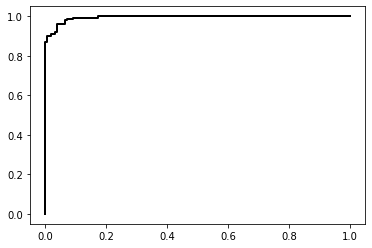

C =  200
Real_data_accuracy   :  0.9515
Random data_accuracy :  0.9547
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9875963794837412


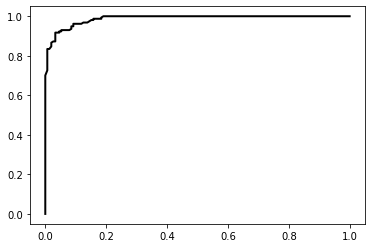

Random Data Processing for horizon =  250
Random data AUC =  0.9884135098893732


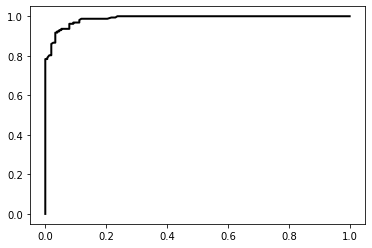

C =  200
Real_data_accuracy   :  0.9256
Random data_accuracy :  0.9288
Gain =  -0.0032
---------------------------------------------

TLT
Real Data Processing for horizon =  1
AUC good =  0.8818582214765099


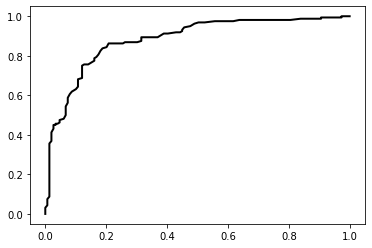

Random Data Processing for horizon =  1
Random data AUC =  0.8847105704697986


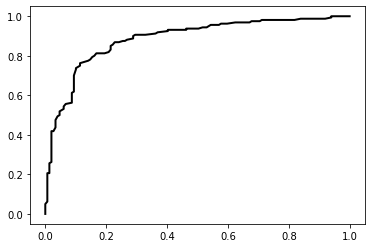

C =  200
Real_data_accuracy   :  0.8285
Random data_accuracy :  0.8058
Gain =  0.0227
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.942151357693597


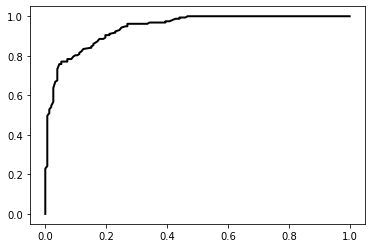

Random Data Processing for horizon =  3
Random data AUC =  0.9430942004693262


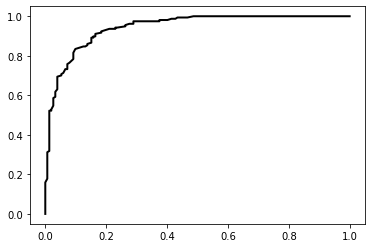

C =  200
Real_data_accuracy   :  0.8511
Random data_accuracy :  0.8738
Gain =  -0.0227
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9224275180157534


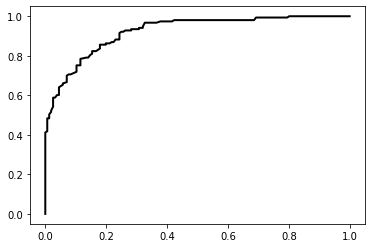

Random Data Processing for horizon =  5
Random data AUC =  0.9241871962460199


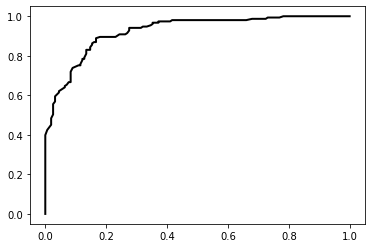

C =  200
Real_data_accuracy   :  0.8317
Random data_accuracy :  0.8576
Gain =  -0.0259
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9295092281879195


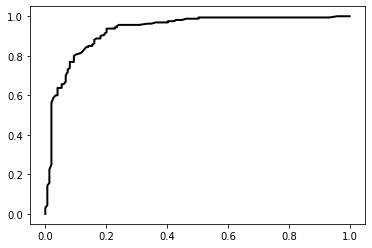

Random Data Processing for horizon =  10
Random data AUC =  0.926006711409396


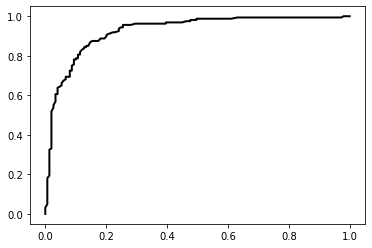

C =  200
Real_data_accuracy   :  0.8576
Random data_accuracy :  0.8544
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9806242144951823


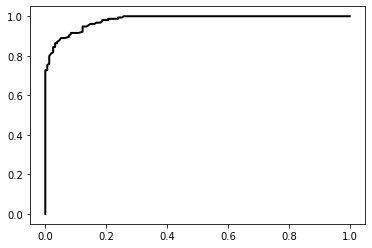

Random Data Processing for horizon =  20
Random data AUC =  0.9807498952660243


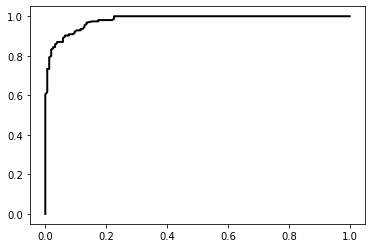

C =  200
Real_data_accuracy   :  0.9061
Random data_accuracy :  0.9094
Gain =  -0.0033
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9707235731171902


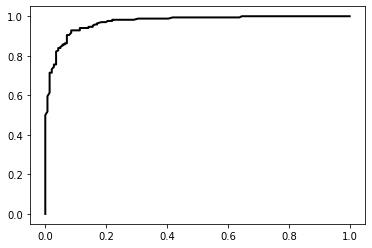

Random Data Processing for horizon =  40
Random data AUC =  0.9712090509962851


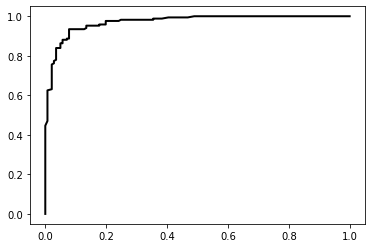

C =  200
Real_data_accuracy   :  0.9223
Random data_accuracy :  0.9223
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.98989898989899


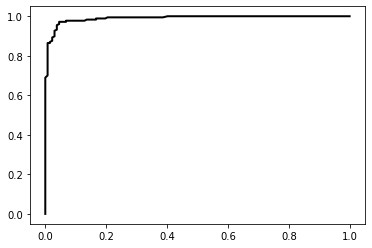

Random Data Processing for horizon =  60
Random data AUC =  0.9910332134908406


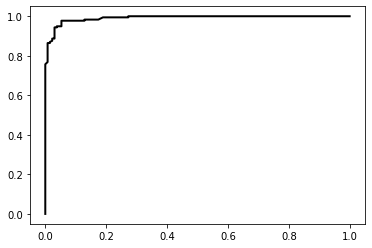

C =  200
Real_data_accuracy   :  0.9579
Random data_accuracy :  0.9547
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9951394943330426


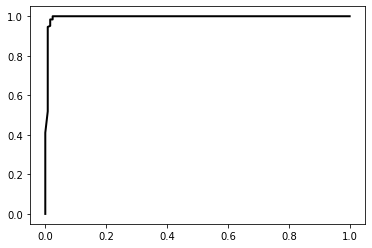

Random Data Processing for horizon =  120
Random data AUC =  0.9967741935483871


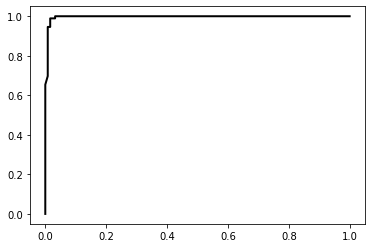

C =  200
Real_data_accuracy   :  0.9838
Random data_accuracy :  0.9871
Gain =  -0.0033
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9970657276995305


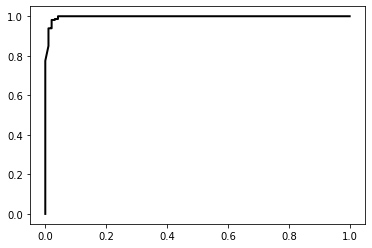

Random Data Processing for horizon =  250
Random data AUC =  0.9974814162754303


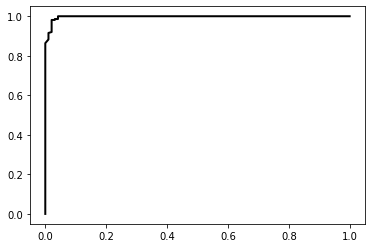

C =  200
Real_data_accuracy   :  0.9806
Random data_accuracy :  0.9806
Gain =  0.0
---------------------------------------------

LQD
Real Data Processing for horizon =  1
AUC good =  0.8376576955424726


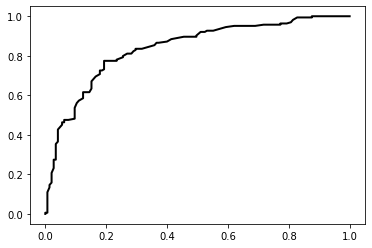

Random Data Processing for horizon =  1
Random data AUC =  0.8414213624894868


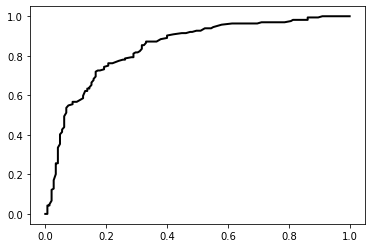

C =  200
Real_data_accuracy   :  0.7702
Random data_accuracy :  0.7638
Gain =  0.0064
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.9190307328605202


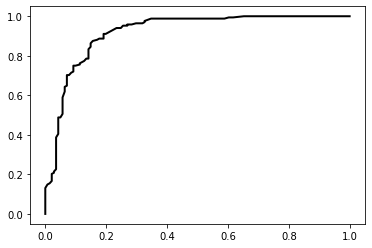

Random Data Processing for horizon =  3
Random data AUC =  0.9158434650455928


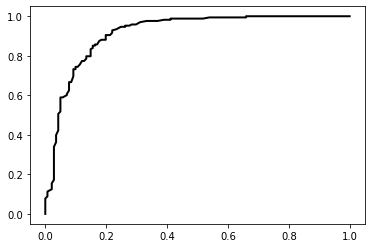

C =  200
Real_data_accuracy   :  0.8608
Random data_accuracy :  0.8511
Gain =  0.0097
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9442071086807929


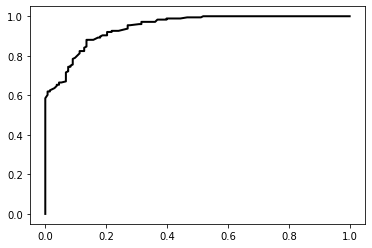

Random Data Processing for horizon =  5
Random data AUC =  0.9458732057416267


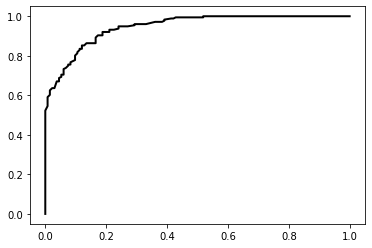

C =  200
Real_data_accuracy   :  0.8641
Random data_accuracy :  0.8673
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9555345524881309


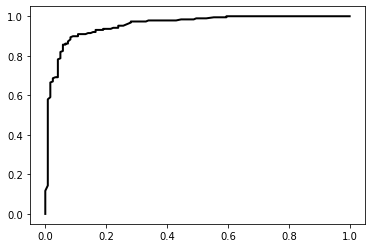

Random Data Processing for horizon =  10
Random data AUC =  0.9577105679620187


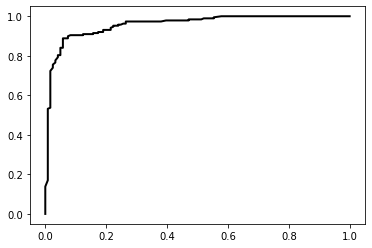

C =  200
Real_data_accuracy   :  0.89
Random data_accuracy :  0.89
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9760820539509063


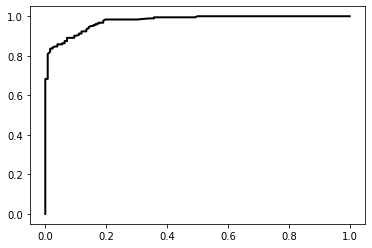

Random Data Processing for horizon =  20
Random data AUC =  0.9766675340445833


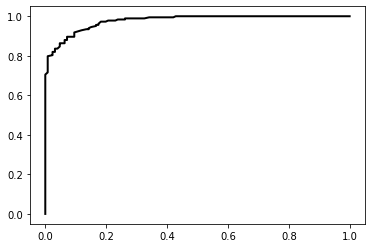

C =  200
Real_data_accuracy   :  0.9029
Random data_accuracy :  0.9061
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9882382382382382


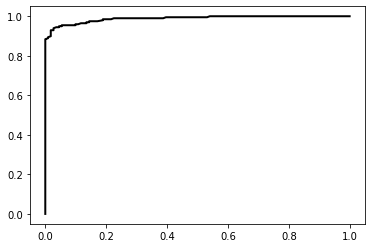

Random Data Processing for horizon =  40
Random data AUC =  0.988875238875239


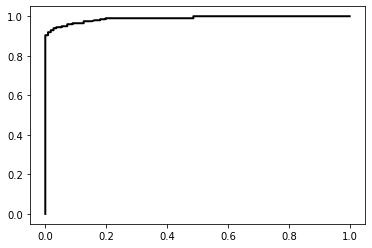

C =  200
Real_data_accuracy   :  0.9385
Random data_accuracy :  0.9417
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9956960157402854


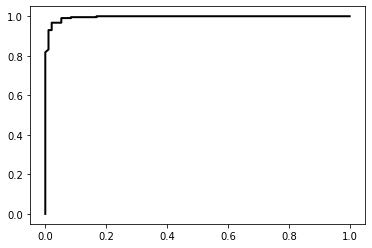

Random Data Processing for horizon =  60
Random data AUC =  0.9957943925233644


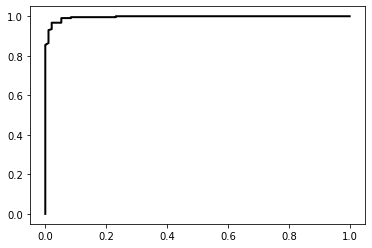

C =  200
Real_data_accuracy   :  0.9709
Random data_accuracy :  0.9676
Gain =  0.0033
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9947575360419397


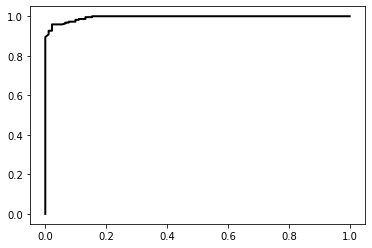

Random Data Processing for horizon =  120
Random data AUC =  0.9948583526565178


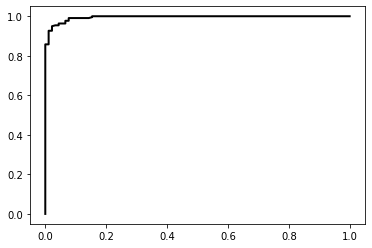

C =  200
Real_data_accuracy   :  0.9547
Random data_accuracy :  0.9547
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9979272959183674


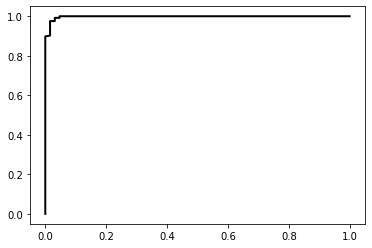

Random Data Processing for horizon =  250
Random data AUC =  0.9983418367346939


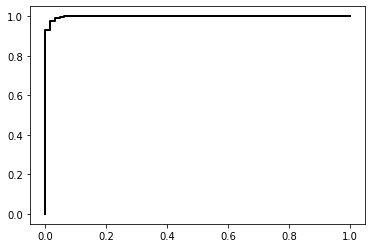

C =  200
Real_data_accuracy   :  0.9838
Random data_accuracy :  0.9838
Gain =  -0.0
---------------------------------------------

TIP
Real Data Processing for horizon =  1
AUC good =  0.8747695659460366


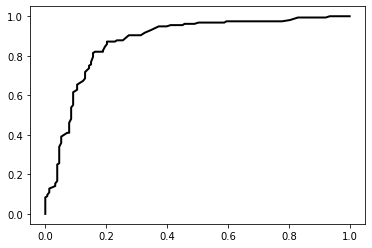

Random Data Processing for horizon =  1
Random data AUC =  0.869343891402715


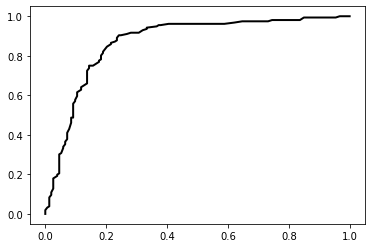

C =  200
Real_data_accuracy   :  0.8026
Random data_accuracy :  0.7961
Gain =  0.0065
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8946376204440721


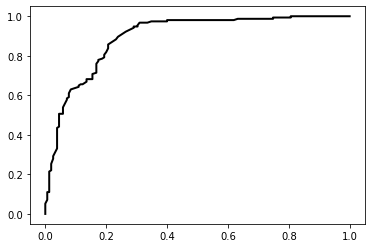

Random Data Processing for horizon =  3
Random data AUC =  0.8916212819438626


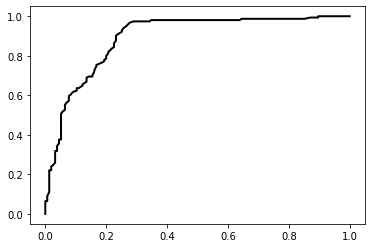

C =  200
Real_data_accuracy   :  0.7929
Random data_accuracy :  0.7896
Gain =  0.0033
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9326181696278913


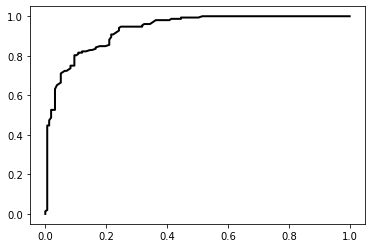

Random Data Processing for horizon =  5
Random data AUC =  0.9257039892725444


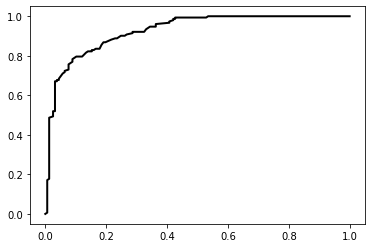

C =  200
Real_data_accuracy   :  0.8285
Random data_accuracy :  0.8382
Gain =  -0.0097
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9597578347578348


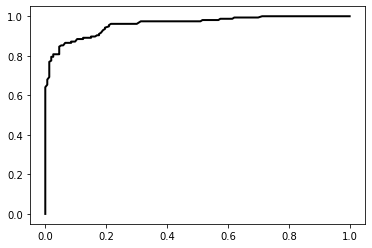

Random Data Processing for horizon =  10
Random data AUC =  0.9641360817831406


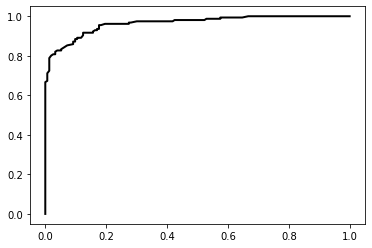

C =  200
Real_data_accuracy   :  0.8803
Random data_accuracy :  0.89
Gain =  -0.0097
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9678130511463845


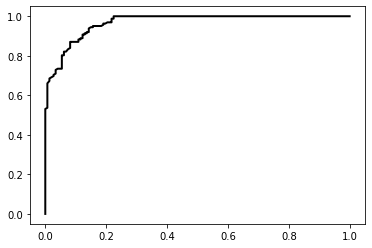

Random Data Processing for horizon =  20
Random data AUC =  0.9656504577139498


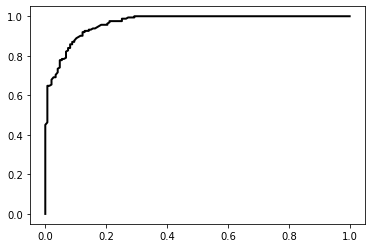

C =  200
Real_data_accuracy   :  0.89
Random data_accuracy :  0.8932
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9695962994112699


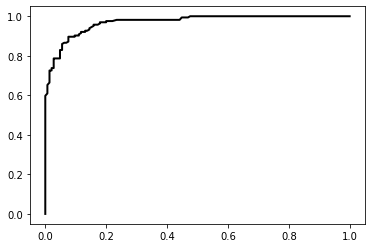

Random Data Processing for horizon =  40
Random data AUC =  0.9684398654331371


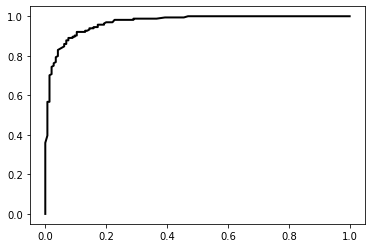

C =  200
Real_data_accuracy   :  0.9094
Random data_accuracy :  0.8997
Gain =  0.0097
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9810555088309504


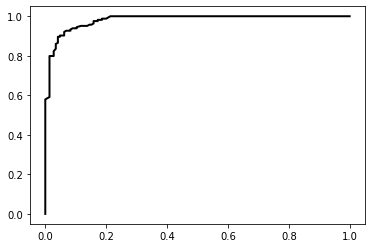

Random Data Processing for horizon =  60
Random data AUC =  0.9818544995794786


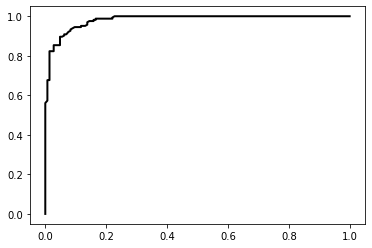

C =  200
Real_data_accuracy   :  0.9288
Random data_accuracy :  0.9223
Gain =  0.0065
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9934132996632997


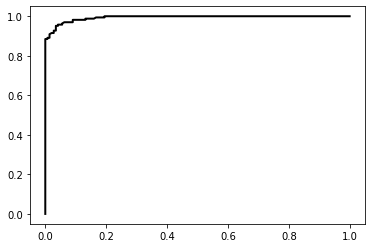

Random Data Processing for horizon =  120
Random data AUC =  0.9934343434343434


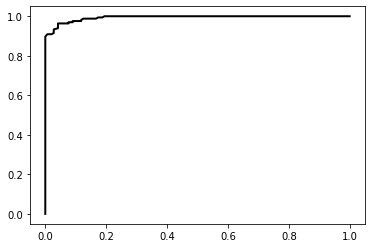

C =  200
Real_data_accuracy   :  0.9579
Random data_accuracy :  0.9579
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9999361430395914


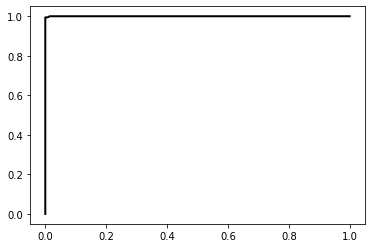

Random Data Processing for horizon =  250
Random data AUC =  1.0


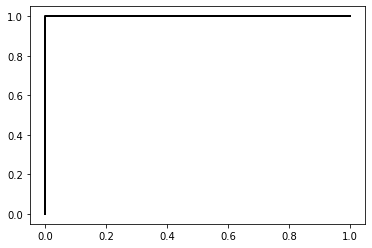

C =  200
Real_data_accuracy   :  0.9968
Random data_accuracy :  1.0
Gain =  -0.0032
---------------------------------------------

IYR
Real Data Processing for horizon =  1
AUC good =  0.7593490007719359


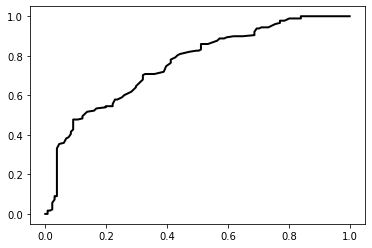

Random Data Processing for horizon =  1
Random data AUC =  0.7695557080367098


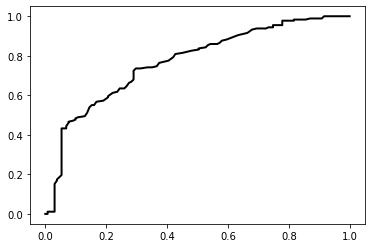

C =  200
Real_data_accuracy   :  0.6764
Random data_accuracy :  0.6893
Gain =  -0.0129
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.9027212944535778


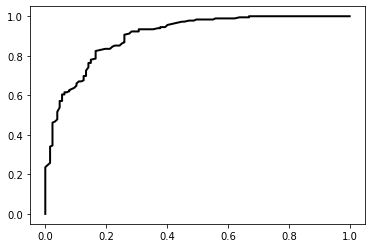

Random Data Processing for horizon =  3
Random data AUC =  0.906982780998529


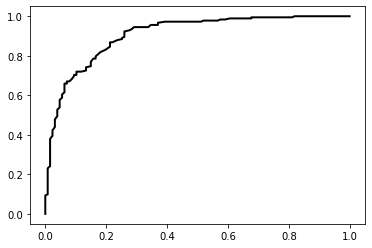

C =  200
Real_data_accuracy   :  0.8155
Random data_accuracy :  0.8317
Gain =  -0.0162
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9271402550091075


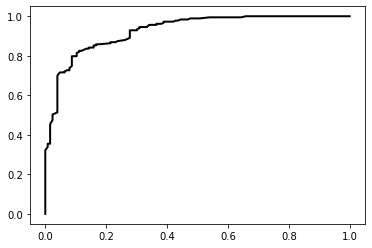

Random Data Processing for horizon =  5
Random data AUC =  0.9375271055598924


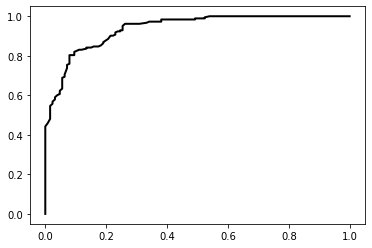

C =  200
Real_data_accuracy   :  0.8285
Random data_accuracy :  0.8576
Gain =  -0.0291
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9359262784459634


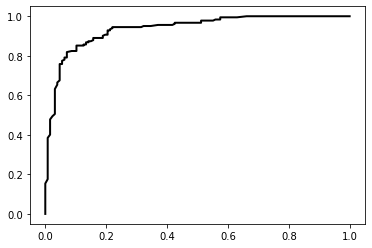

Random Data Processing for horizon =  10
Random data AUC =  0.9361642294713162


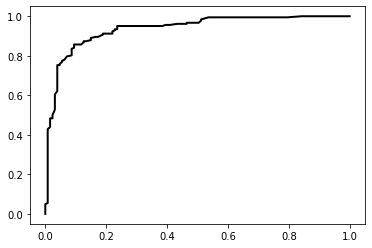

C =  200
Real_data_accuracy   :  0.8608
Random data_accuracy :  0.8706
Gain =  -0.0098
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9799589124923507


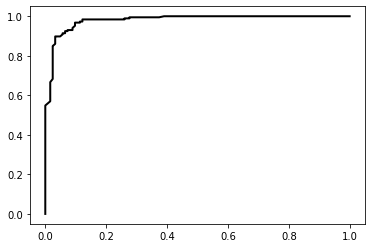

Random Data Processing for horizon =  20
Random data AUC =  0.982253693504677


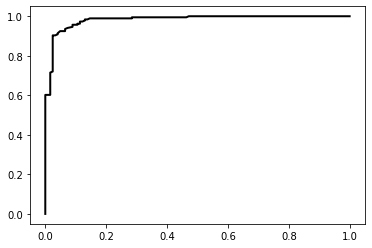

C =  200
Real_data_accuracy   :  0.9417
Random data_accuracy :  0.9353
Gain =  0.0064
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.988949433304272


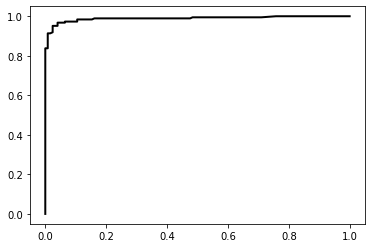

Random Data Processing for horizon =  40
Random data AUC =  0.9902136006974718


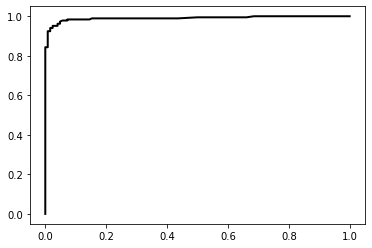

C =  200
Real_data_accuracy   :  0.9547
Random data_accuracy :  0.9579
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9894062078272604


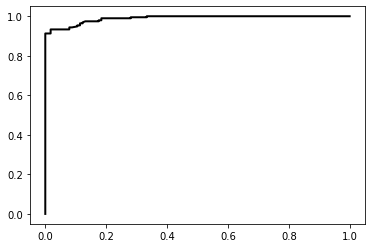

Random Data Processing for horizon =  60
Random data AUC =  0.9898335582546108


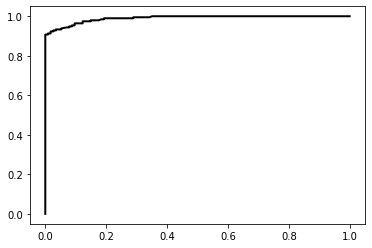

C =  200
Real_data_accuracy   :  0.9353
Random data_accuracy :  0.9353
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9991334033613446


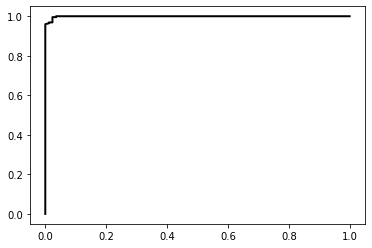

Random Data Processing for horizon =  120
Random data AUC =  0.9991596638655463


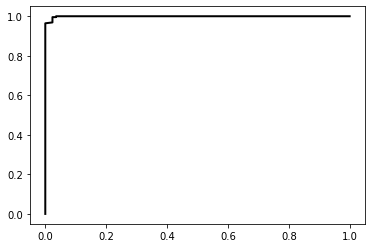

C =  200
Real_data_accuracy   :  0.9903
Random data_accuracy :  0.9903
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9876955161626695


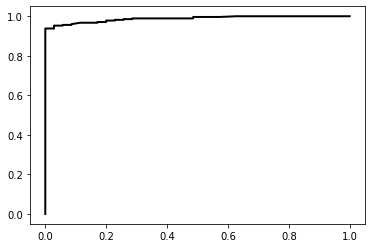

Random Data Processing for horizon =  250
Random data AUC =  0.9877476538060479


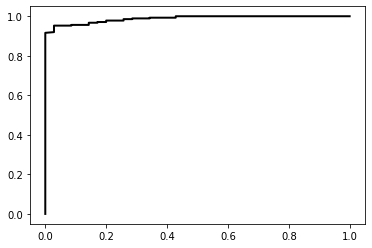

C =  200
Real_data_accuracy   :  0.9579
Random data_accuracy :  0.9547
Gain =  0.0032
---------------------------------------------

GLD
Real Data Processing for horizon =  1
AUC good =  0.678909853249476


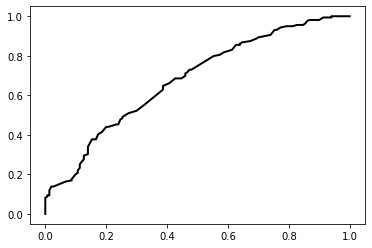

Random Data Processing for horizon =  1
Random data AUC =  0.6741509433962264


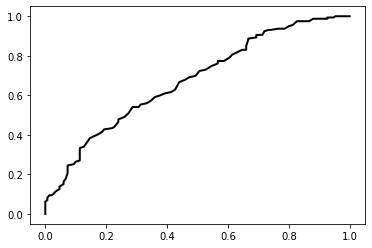

C =  200
Real_data_accuracy   :  0.6149
Random data_accuracy :  0.6149
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8094140330287535


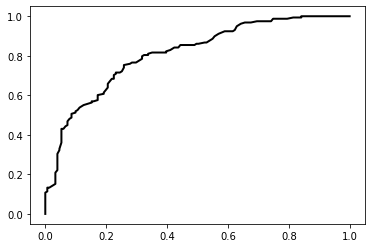

Random Data Processing for horizon =  3
Random data AUC =  0.8141084751446055


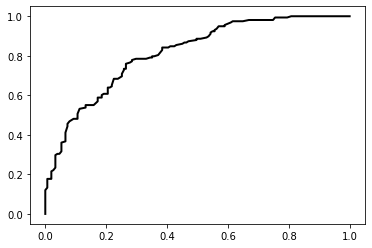

C =  200
Real_data_accuracy   :  0.7249
Random data_accuracy :  0.712
Gain =  0.0129
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.897649178679182


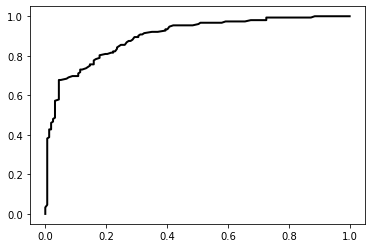

Random Data Processing for horizon =  5
Random data AUC =  0.8983405967147168


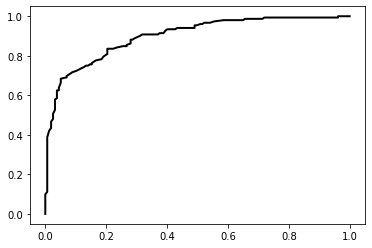

C =  200
Real_data_accuracy   :  0.7961
Random data_accuracy :  0.8058
Gain =  -0.0097
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9187956971174048


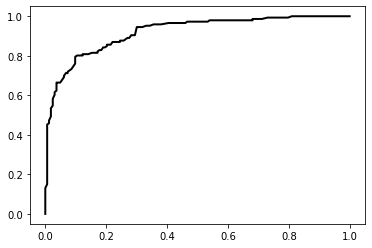

Random Data Processing for horizon =  10
Random data AUC =  0.9192789310026053


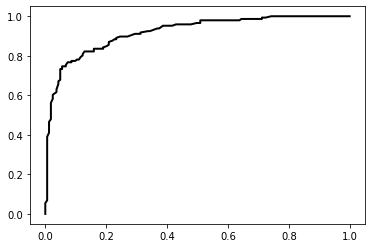

C =  200
Real_data_accuracy   :  0.8252
Random data_accuracy :  0.835
Gain =  -0.0098
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.952064336372847


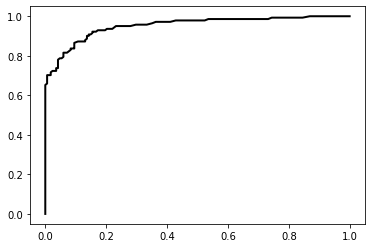

Random Data Processing for horizon =  20
Random data AUC =  0.9515577507598784


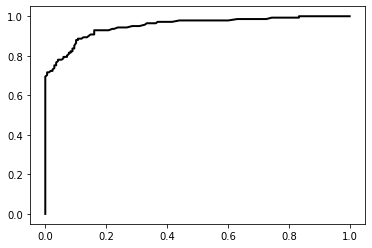

C =  200
Real_data_accuracy   :  0.8738
Random data_accuracy :  0.8738
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9747230525760506


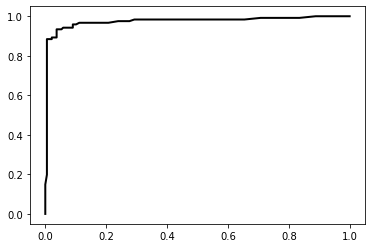

Random Data Processing for horizon =  40
Random data AUC =  0.9740196940390364


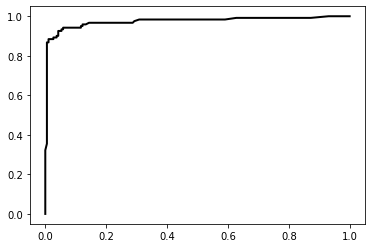

C =  200
Real_data_accuracy   :  0.9385
Random data_accuracy :  0.9353
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9855885482154948


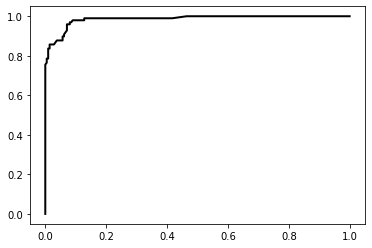

Random Data Processing for horizon =  60
Random data AUC =  0.9848147789921656


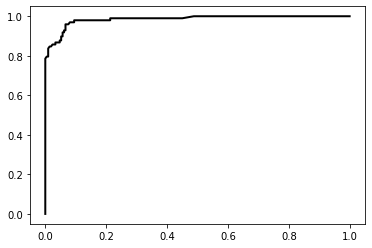

C =  200
Real_data_accuracy   :  0.9288
Random data_accuracy :  0.9288
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9789438502673798


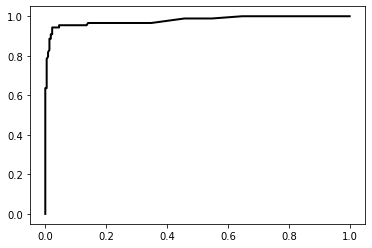

Random Data Processing for horizon =  120
Random data AUC =  0.9718994241053065


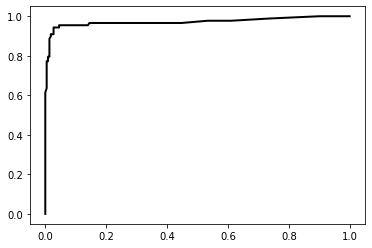

C =  200
Real_data_accuracy   :  0.9547
Random data_accuracy :  0.9579
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9977796965585297


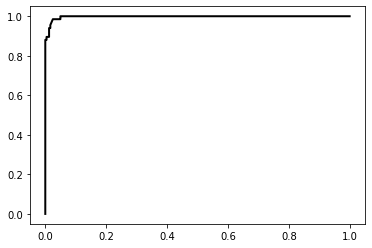

Random Data Processing for horizon =  250
Random data AUC =  0.9972862957937585


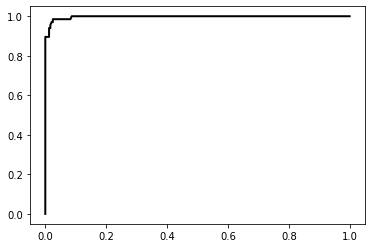

C =  200
Real_data_accuracy   :  0.9676
Random data_accuracy :  0.9709
Gain =  -0.0033
---------------------------------------------

FXE
Real Data Processing for horizon =  1
AUC good =  0.6998737373737374


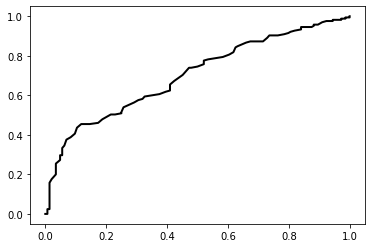

Random Data Processing for horizon =  1
Random data AUC =  0.6592382154882155


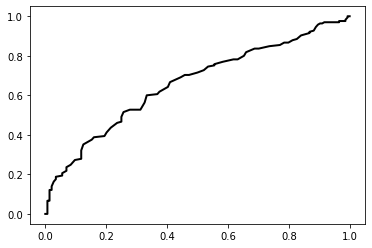

C =  200
Real_data_accuracy   :  0.6311
Random data_accuracy :  0.6019
Gain =  0.0292
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8613884228187919


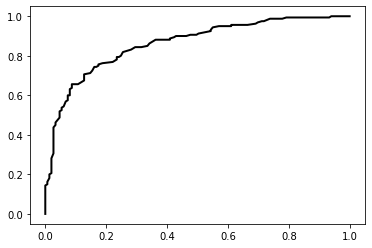

Random Data Processing for horizon =  3
Random data AUC =  0.8656879194630872


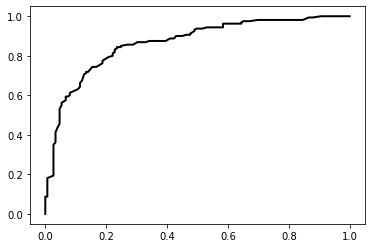

C =  200
Real_data_accuracy   :  0.7896
Random data_accuracy :  0.7864
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9198406040268455


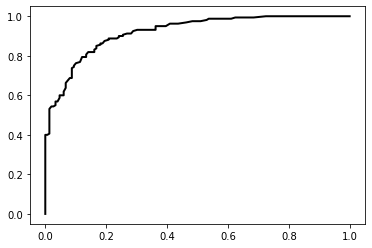

Random Data Processing for horizon =  5
Random data AUC =  0.9196937919463087


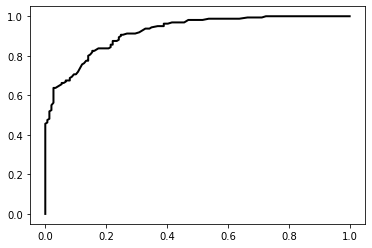

C =  200
Real_data_accuracy   :  0.8285
Random data_accuracy :  0.8155
Gain =  0.013
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9332914046121593


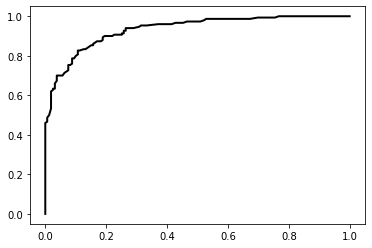

Random Data Processing for horizon =  10
Random data AUC =  0.9342557651991614


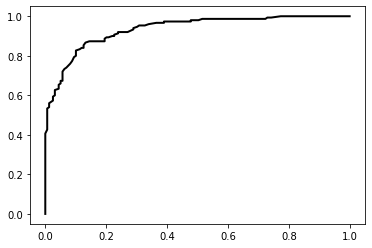

C =  200
Real_data_accuracy   :  0.8576
Random data_accuracy :  0.8608
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9569824383654171


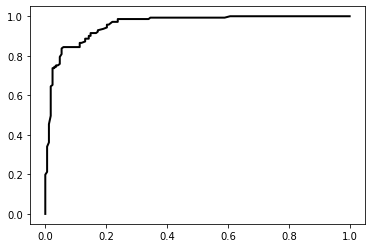

Random Data Processing for horizon =  20
Random data AUC =  0.9560114826072273


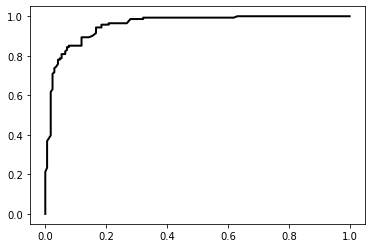

C =  200
Real_data_accuracy   :  0.877
Random data_accuracy :  0.8867
Gain =  -0.0097
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9873322147651007


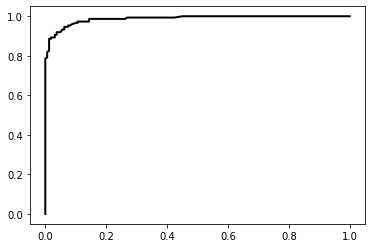

Random Data Processing for horizon =  40
Random data AUC =  0.9884857382550336


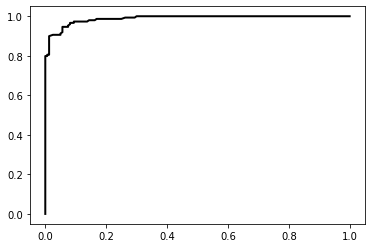

C =  200
Real_data_accuracy   :  0.9353
Random data_accuracy :  0.9353
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9861111111111112


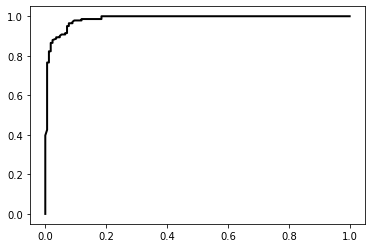

Random Data Processing for horizon =  60
Random data AUC =  0.9858789260385005


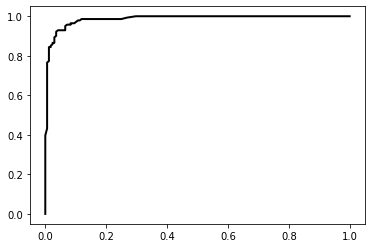

C =  200
Real_data_accuracy   :  0.9256
Random data_accuracy :  0.9385
Gain =  -0.0129
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9938565371636238


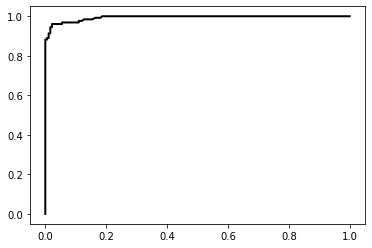

Random Data Processing for horizon =  120
Random data AUC =  0.9935536904040841


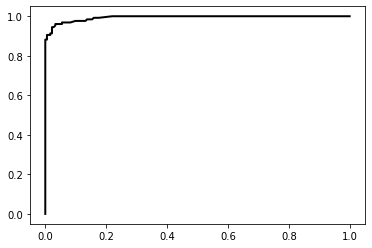

C =  200
Real_data_accuracy   :  0.9547
Random data_accuracy :  0.9515
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9991208018287322


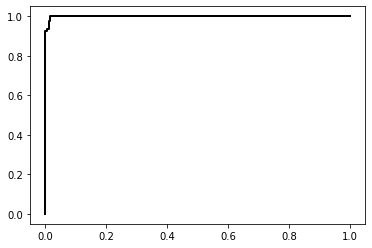

Random Data Processing for horizon =  250
Random data AUC =  0.9992526815544224


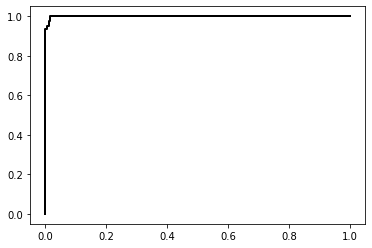

C =  200
Real_data_accuracy   :  0.9773
Random data_accuracy :  0.9741
Gain =  0.0032
---------------------------------------------

Wall time: 13min 32s


In [9]:
%%time


all_result = {}

for i in df_col:
    
    print(i)
    
    sub_result = {}
    
    for j in td:
                                
        y_col = str(i)+"_"+str(j)+"_y"
        p_col = str(i)+"_p"
        v_col = str(i)+"_v"
                
                
        X = df.drop([y_col,p_col,v_col, "date","month","week"], axis = 1)
        y = df[y_col]
        
        
        r_X = r_df.drop([y_col,p_col,v_col,"date","month","week"], axis = 1)
        r_y = r_df[y_col]
                
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(r_X, r_y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        
        r_sc = StandardScaler()
        r_sc.fit(r_X_train)
        r_X_train_std = r_sc.transform(X_train)
        r_X_test_std = r_sc.transform(X_test)
        
        
        print("Real Data Processing for horizon = ",j)
        
        maxval = -10000.0
        c = 0.0
        sval = 0.0
        
        
        
        for numtrees in {100,200,300}:
            lw=2
            clf = RandomForestClassifier(n_estimators=numtrees, 
                                         criterion='gini')
            
            scores = cross_val_score(clf, X_train_std, y_train, cv=3)
            ascores = scores.mean()
            
            r_scores = cross_val_score(clf, r_X_train_std, r_y_train, cv=3)
            r_ascores = scores.mean()
            
            
            real_random = ascores - r_ascores
            
            sval = sval + real_random
            
            if maxval < real_random:
                
                maxval = real_random
                c = numtrees
                
        clf = RandomForestClassifier(n_estimators=int(c),criterion='gini')
        clf.fit(X_train_std,y_train)

        predictions = clf.predict(X_test_std)
        probs = clf.predict_proba(X_test_std)


        fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("AUC good = ",roc_auc)        
        plt.plot(fpr, tpr, lw=lw, color='black')
        #plt.title("Horizon = "+str(filename))
        plt.show()
        
        
        print("Random Data Processing for horizon = ",j)
        
        
        clf = RandomForestClassifier(n_estimators=int(c),criterion='gini')
        clf.fit(r_X_train_std,y_train)

        r_predictions = clf.predict(r_X_test_std)
        r_probs = clf.predict_proba(r_X_test_std)


        fpr, tpr, thresholds = roc_curve(r_y_test, r_probs[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("Random data AUC = ",roc_auc)        
        plt.plot(fpr, tpr, lw=lw, color='black')
        #plt.title("Horizon = "+str(filename))
        plt.show()
        
        print ("C = ",c)
        real_accuracy = round(metrics.accuracy_score(y_test, predictions),4)
        random_accuracy = round(metrics.accuracy_score(r_y_test, r_predictions),4)
        
        print("Real_data_accuracy   : ", real_accuracy)
        print("Random data_accuracy : ", random_accuracy)
                
        gain = (real_accuracy - metrics.accuracy_score(r_y_test,r_predictions))
        
        print ("Gain = ",round(gain,4))
        print ("---------------------------------------------\n")
        
        v_real_accuracy = str(j) + "_real_accuracy"
        v_random_accuracy = str(j) + "_random_accuracy"
        v_gain = str(j) +"_gain"
        
        sub_result[v_real_accuracy] = real_accuracy 
        sub_result[v_random_accuracy] = random_accuracy
        sub_result[v_gain] = gain
        
    all_result[i] = sub_result

In [10]:
all_result

{'SPY': {'1_real_accuracy': 0.8447,
  '1_random_accuracy': 0.8382,
  '1_gain': 0.006512297734627803,
  '3_real_accuracy': 0.8803,
  '3_random_accuracy': 0.8706,
  '3_gain': 0.009749838187702253,
  '5_real_accuracy': 0.8835,
  '5_random_accuracy': 0.877,
  '5_gain': 0.0064773462783170865,
  '10_real_accuracy': 0.8576,
  '10_random_accuracy': 0.8447,
  '10_gain': 0.01293980582524279,
  '20_real_accuracy': 0.9094,
  '20_random_accuracy': 0.9191,
  '20_gain': -0.00969385113268606,
  '40_real_accuracy': 0.945,
  '40_random_accuracy': 0.9482,
  '40_gain': -0.0032200647249190917,
  '60_real_accuracy': 0.9612,
  '60_random_accuracy': 0.9579,
  '60_gain': 0.003271197411003346,
  '120_real_accuracy': 0.9806,
  '120_random_accuracy': 0.9773,
  '120_gain': 0.0032537216828478766,
  '250_real_accuracy': 0.9773,
  '250_random_accuracy': 0.9773,
  '250_gain': -4.6278317152204096e-05},
 'IWM': {'1_real_accuracy': 0.7799,
  '1_random_accuracy': 0.7767,
  '1_gain': 0.0032009708737864573,
  '3_real_accura

In [11]:
final_results = pd.DataFrame(all_result)

In [12]:
final_results

,SPY,IWM,EEM,TLT,LQD,TIP,IYR,GLD,FXE
1_real_accuracy,0.844700,0.779900,0.737900,0.828500,0.770200,0.802600,0.676400,0.614900,0.631100
1_random_accuracy,0.838200,0.776700,0.737900,0.805800,0.763800,0.796100,0.689300,0.614900,0.601900
1_gain,0.006512,0.003201,0.000036,0.022675,0.006446,0.006483,-0.012920,0.000013,0.029158
3_real_accuracy,0.880300,0.854400,0.786400,0.851100,0.860800,0.792900,0.815500,0.724900,0.789600
3_random_accuracy,0.870600,0.860800,0.773500,0.873800,0.851100,0.789600,0.831700,0.712000,0.786400
3_gain,0.009750,-0.006441,0.012937,-0.022686,0.009667,0.003256,-0.016215,0.012926,0.003192
5_real_accuracy,0.883500,0.877000,0.831700,0.831700,0.864100,0.828500,0.828500,0.796100,0.828500
5_random_accuracy,0.877000,0.870600,0.841400,0.857600,0.867300,0.838200,0.857600,0.805800,0.815500
5_gain,0.006477,0.006450,-0.009724,-0.025905,-0.003214,-0.009688,-0.029105,-0.009725,0.012966
10_real_accuracy,0.857600,0.873800,0.841400,0.857600,0.890000,0.880300,0.860800,0.825200,0.857600


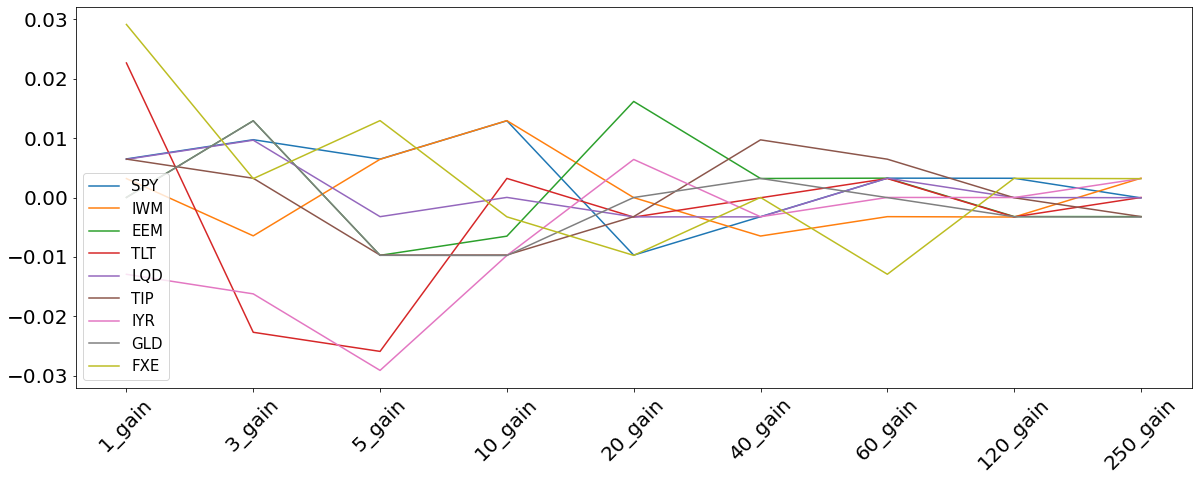

In [13]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('gain')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()

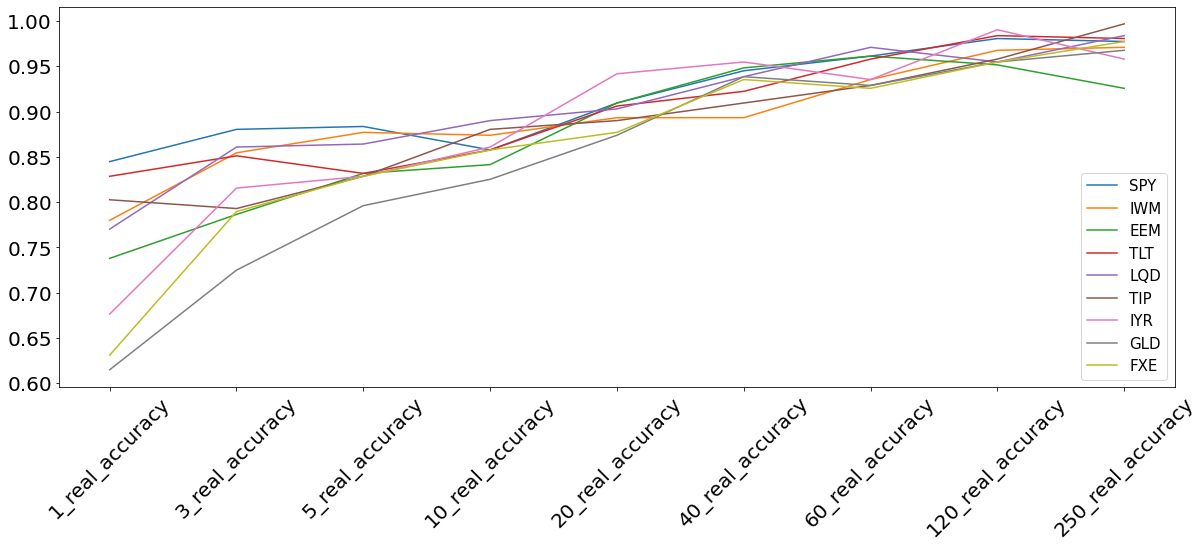

In [14]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('real_accuracy')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()